<a href="https://colab.research.google.com/github/youngkisohn/youngkisohn/blob/main/2022_pandas_04_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.dtypes[df.dtypes == 'object'].index

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

In [ ]:
df.dtypes 

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
df.describe().columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
for i in df.describe().columns:
  print(df[i].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64


In [ ]:
df[['age', 'fare']].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


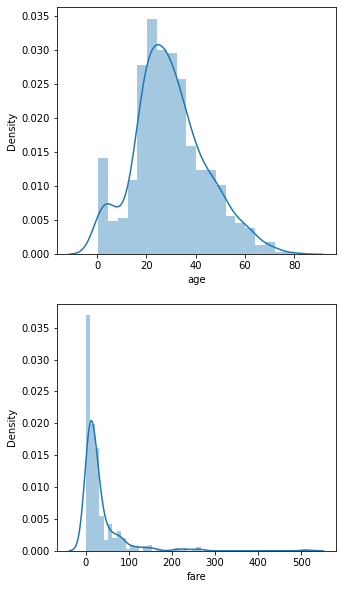

In [ ]:
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.distplot(df.age, ax=ax1)
sns.distplot(df.fare, ax=ax2)

plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

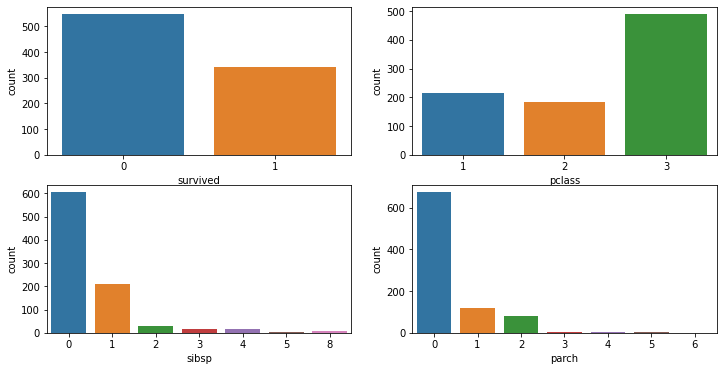

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.countplot(df.survived, ax=ax1)
sns.countplot(df.pclass, ax=ax2)
sns.countplot(df.sibsp, ax=ax3)
sns.countplot(df.parch, ax=ax4)

plt.show()

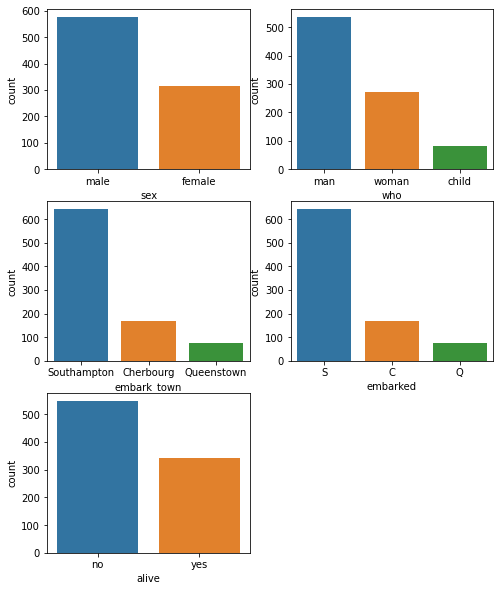

In [ ]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)

sns.countplot(df.sex, ax=ax1)
sns.countplot(df.who, ax=ax2)
sns.countplot(df.alive, ax=ax5)
sns.countplot(df.embarked, ax=ax4)
sns.countplot(df.embark_town, ax=ax3)

plt.show()

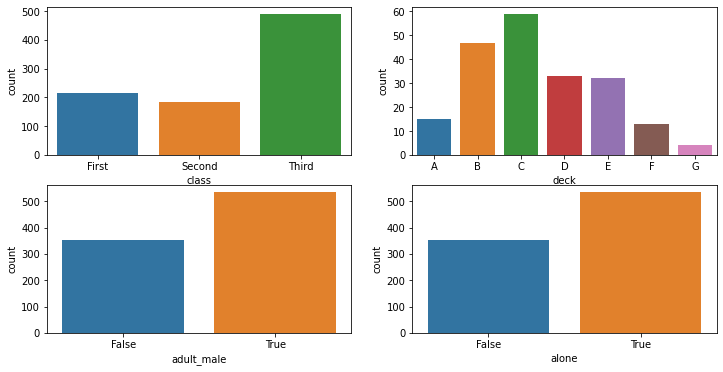

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.countplot(df['class'], ax=ax1)
sns.countplot(df.deck, ax=ax2)
sns.countplot(df.adult_male, ax=ax3)
sns.countplot(df.alone, ax=ax4)

plt.show()

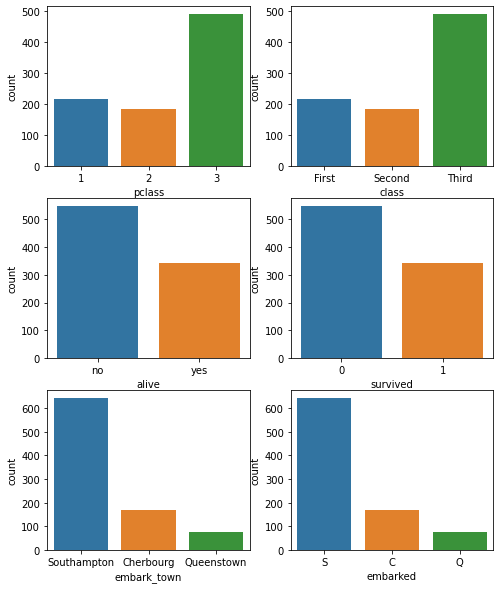

In [ ]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

sns.countplot(df.pclass, ax=ax1)
sns.countplot(df['class'], ax=ax2)
sns.countplot(df.alive, ax=ax3)
sns.countplot(df.survived, ax=ax4)
sns.countplot(df.embark_town, ax=ax5)
sns.countplot(df.embarked, ax=ax6)

plt.show()

In [ ]:
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)

In [ ]:
df['family'] = df['sibsp'] + df['parch']
df.drop(['sibsp', 'parch'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,fare,embarked,deck,family
0,0,3,male,22.0,7.2500,S,NaN,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,S,NaN,0
3,1,1,female,35.0,53.1000,S,C,1
4,0,3,male,35.0,8.0500,S,NaN,0


In [ ]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
deck        688
family        0
dtype: int64

In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
df1.embarked.fillna('S', inplace=True)

In [ ]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      0
deck        688
family        0
dtype: int64

In [ ]:
df.groupby('sex').age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [ ]:
df.groupby('pclass').age.median()

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

In [ ]:
rt = df.groupby(['sex', 'pclass']).age.median()
rt

sex     pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: age, dtype: float64

In [ ]:
rt['male', 1]

40.0

In [ ]:
df1.loc[(df1.sex=='male')&(df1.pclass==1)&(df1.age.isna()), 'age'] = rt['male', 1]
df1.loc[(df1.sex=='male')&(df1.pclass==2)&(df1.age.isna()), 'age'] = rt['male', 2]
df1.loc[(df1.sex=='male')&(df1.pclass==3)&(df1.age.isna()), 'age'] = rt['male', 3]
df1.loc[(df1.sex=='female')&(df1.pclass==1)&(df1.age.isna()), 'age'] = rt['female', 1]
df1.loc[(df1.sex=='female')&(df1.pclass==2)&(df1.age.isna()), 'age'] = rt['female', 2]
df1.loc[(df1.sex=='female')&(df1.pclass==3)&(df1.age.isna()), 'age'] = rt['female', 3]

In [ ]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
fare          0
embarked      0
deck        688
family        0
dtype: int64

In [ ]:
df1.drop('deck', axis=1, inplace=True)

In [ ]:
df1.isna().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
family      0
dtype: int64

In [ ]:
df2.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

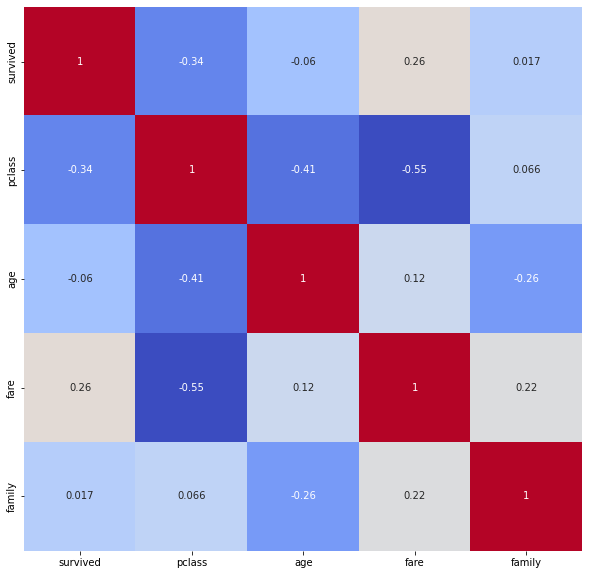

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm',
            cbar=False, )
plt.show()

In [ ]:
df.

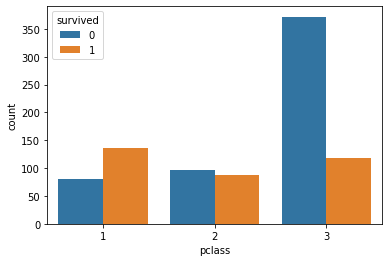

In [ ]:
sns.countplot(x='pclass', hue='survived', data=df1)

In [ ]:
df

,survived,pclass,sex,age,fare,embarked,deck,family
0,0,3,male,22.0,7.2500,S,NaN,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,S,NaN,0
3,1,1,female,35.0,53.1000,S,C,1
4,0,3,male,35.0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,NaN,0
887,1,1,female,19.0,30.0000,S,B,0
888,0,3,female,NaN,23.4500,S,NaN,3
889,1,1,male,26.0,30.0000,C,C,0
